# Gradient descent 

## Estimating the Gradient

In [1]:
from typing import Callable


def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """Acts like approximate derivative"""
    return (f(x + h) - f(x)) / h


def square(x: float) -> float:
    """Y=X^2 function"""
    return x * x


def derivative(x: float) -> float:
    """Actual derivative"""
    return 2 * x

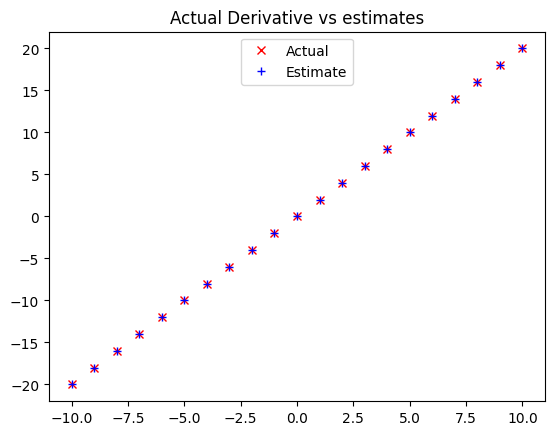

In [2]:
import matplotlib.pyplot as plt

xs = range(-10, 11)
actual_ys = [derivative(x) for x in xs]
estimated_ys = [difference_quotient(square, x, h=0.001) for x in xs]

plt.title("Actual Derivative vs estimates")
plt.plot(xs, actual_ys, 'rx', label='Actual')
plt.plot(xs, estimated_ys, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [3]:
from typing import List

Vector = List[float]


def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""

    w = [v_j + (h if j == i else 0)
         # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h


def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

## Calculating the gradient